In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mock_kaggle.csv')
df

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


In [3]:
to_english = {
    'data':'date',
    'venda':'sale',
    'estoque':'stock',
    'preco':'price'
}
df.rename(columns=to_english, inplace=True)
df

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


In [4]:
df['revenue'] = df['sale'] * df['price']
df

,date,sale,stock,price,revenue
0,2014-01-01,0,4972,1.29,0.00
1,2014-01-02,70,4902,1.29,90.30
2,2014-01-03,59,4843,1.29,76.11
3,2014-01-04,93,4750,1.29,119.97
4,2014-01-05,96,4654,1.29,123.84
...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,234.22
933,2016-07-28,108,3071,2.39,258.12
934,2016-07-29,128,4095,2.39,305.92
935,2016-07-30,270,3825,2.39,645.30


In [5]:
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

In [6]:
s_2014 = df[:359]
s_2015 = df[359:724]
s_2016 = df[724:]
s_2014

,date,sale,stock,price,revenue
date,,,,,
01-01-2014,2014-01-01,0,4972,1.29,0.00
02-01-2014,2014-01-02,70,4902,1.29,90.30
03-01-2014,2014-01-03,59,4843,1.29,76.11
04-01-2014,2014-01-04,93,4750,1.29,119.97
05-01-2014,2014-01-05,96,4654,1.29,123.84
...,...,...,...,...,...
27-12-2014,2014-12-27,42,328,1.29,54.18
28-12-2014,2014-12-28,45,283,1.29,58.05
29-12-2014,2014-12-29,55,612,1.29,70.95


<Axes: xlabel='date'>

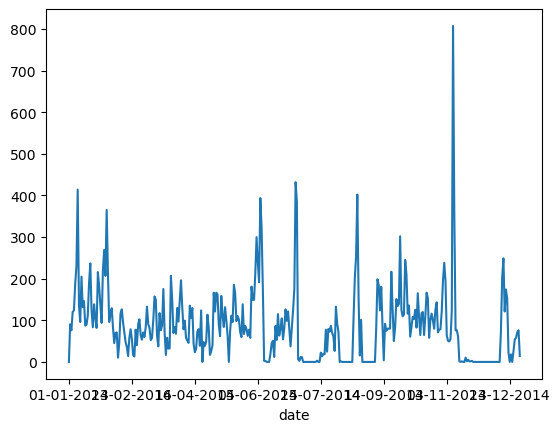

In [7]:
revenue = s_2014['revenue']
revenue.plot()

In [8]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X, y = df_to_X_y(revenue, WINDOW_SIZE)
X.shape, y.shape

((354, 5, 1), (354,))

In [10]:
X

array([[[  0.  ],
        [ 90.3 ],
        [ 76.11],
        [119.97],
        [123.84]],

       [[ 90.3 ],
        [ 76.11],
        [119.97],
        [123.84],
        [187.05]],

       [[ 76.11],
        [119.97],
        [123.84],
        [187.05],
        [230.91]],

       ...,

       [[ 18.06],
        [  0.  ],
        [ 25.8 ],
        [ 54.18],
        [ 58.05]],

       [[  0.  ],
        [ 25.8 ],
        [ 54.18],
        [ 58.05],
        [ 70.95]],

       [[ 25.8 ],
        [ 54.18],
        [ 58.05],
        [ 70.95],
        [ 76.11]]])

In [11]:
y

array([187.05, 230.91, 414.09, 136.25,  95.92, 204.92, 131.89, 146.06,
        87.2 ,  89.38, 111.86, 189.21, 236.81, 123.76,  83.3 , 138.43,
       104.64,  81.75, 215.82, 183.12, 136.25,  93.74, 219.78, 269.28,
       206.91, 365.31, 214.83,  96.03, 115.83, 129.  ,  82.56,  45.15,
        69.66,  70.95,  10.32,  46.87, 116.63, 126.44,  94.83,  71.94,
        47.96,  35.97,  14.17,  57.77,  78.48,  54.5 ,  16.35,  13.08,
        77.39,  40.33,  90.47, 102.46,  64.31,  53.41,  70.85,  59.95,
        83.93, 132.98,  90.47,  81.75,  52.32,  58.05, 100.62, 157.38,
       149.64,  61.92,  37.41, 117.39,  76.11,  87.72, 175.36,  72.24,
        16.77,  58.05,  32.25,  32.25, 207.06, 150.42,  69.76,  83.93,
        67.58, 129.71,  97.01, 144.97, 196.2 , 131.89,  78.48,  99.19,
        57.77,  51.23,  45.78, 135.16, 105.73, 129.71,  43.86,  23.22,
        30.96,  73.53,  78.69,  38.7 , 123.84,   0.  ,  47.73,  38.7 ,
        49.02, 113.52,  82.56,  16.77,  25.8 ,  39.99, 166.41, 121.26,
      

In [12]:
X_train, y_train = X[:283], y[:283]
X_val, y_val = X[283:317], y[283:317]
X_test, y_test = X[317:], y[317:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((283, 5, 1), (283,), (34, 5, 1), (34,), (37, 5, 1), (37,))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [19]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp])

Epoch 1/30
6/9 [===================>..........] - ETA: 0s - loss: 16026.0742 - root_mean_squared_error: 126.5941INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 8s 1s/step - loss: 15118.2402 - root_mean_squared_error: 122.9563 - val_loss: 30982.8926 - val_root_mean_squared_error: 176.0196
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 15092.5508 - root_mean_squared_error: 122.8517INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 8s 944ms/step - loss: 15092.5508 - root_mean_squared_error: 122.8517 - val_loss: 30947.2129 - val_root_mean_squared_error: 175.9182
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 15061.2402 - root_mean_squared_error: 122.7242INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 15061.2402 - root_mean_squared_error: 122.7242 - val_loss: 30908.8418 - val_root_mean_squared_error: 175.8091
Epoch 4/30
9/9 [==============================] - ETA: 0s - loss: 15030.5957 - root_mean_squared_error: 122.5993INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 24s 3s/step - loss: 15030.5957 - root_mean_squared_error: 122.5993 - val_loss: 30882.0781 - val_root_mean_squared_error: 175.7330
Epoch 5/30
6/9 [===================>..........] - ETA: 0s - loss: 14786.2354 - root_mean_squared_error: 121.5987INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 30s 4s/step - loss: 15009.8564 - root_mean_squared_error: 122.5147 - val_loss: 30864.5156 - val_root_mean_squared_error: 175.6830
Epoch 6/30
7/9 [======================>.......] - ETA: 0s - loss: 15332.6357 - root_mean_squared_error: 123.8250INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 13s 2s/step - loss: 14996.4277 - root_mean_squared_error: 122.4599 - val_loss: 30853.2949 - val_root_mean_squared_error: 175.6511
Epoch 7/30
6/9 [===================>..........] - ETA: 0s - loss: 15254.4854 - root_mean_squared_error: 123.5090INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 19s 2s/step - loss: 14985.2510 - root_mean_squared_error: 122.4143 - val_loss: 30842.9961 - val_root_mean_squared_error: 175.6217
Epoch 8/30
6/9 [===================>..........] - ETA: 0s - loss: 15800.5400 - root_mean_squared_error: 125.7002INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 13s 2s/step - loss: 14974.6982 - root_mean_squared_error: 122.3711 - val_loss: 30833.1211 - val_root_mean_squared_error: 175.5936
Epoch 9/30
7/9 [======================>.......] - ETA: 0s - loss: 16652.9766 - root_mean_squared_error: 129.0464INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14964.8037 - root_mean_squared_error: 122.3307 - val_loss: 30823.3594 - val_root_mean_squared_error: 175.5658
Epoch 10/30
9/9 [==============================] - ETA: 0s - loss: 14954.8711 - root_mean_squared_error: 122.2901INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 12s 1s/step - loss: 14954.8711 - root_mean_squared_error: 122.2901 - val_loss: 30813.6230 - val_root_mean_squared_error: 175.5381
Epoch 11/30
6/9 [===================>..........] - ETA: 0s - loss: 16706.8770 - root_mean_squared_error: 129.2551INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 19s 2s/step - loss: 14945.0898 - root_mean_squared_error: 122.2501 - val_loss: 30803.3223 - val_root_mean_squared_error: 175.5088
Epoch 12/30
9/9 [==============================] - ETA: 0s - loss: 14934.3555 - root_mean_squared_error: 122.2062INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 13s 2s/step - loss: 14934.3555 - root_mean_squared_error: 122.2062 - val_loss: 30792.3086 - val_root_mean_squared_error: 175.4774
Epoch 13/30
6/9 [===================>..........] - ETA: 0s - loss: 14158.7500 - root_mean_squared_error: 118.9905INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 20s 3s/step - loss: 14923.1768 - root_mean_squared_error: 122.1605 - val_loss: 30779.8770 - val_root_mean_squared_error: 175.4419
Epoch 14/30
8/9 [=========================>....] - ETA: 0s - loss: 15182.2852 - root_mean_squared_error: 123.2164INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14910.8555 - root_mean_squared_error: 122.1100 - val_loss: 30766.5469 - val_root_mean_squared_error: 175.4039
Epoch 15/30
7/9 [======================>.......] - ETA: 0s - loss: 14749.3389 - root_mean_squared_error: 121.4469INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 9s 1s/step - loss: 14896.7686 - root_mean_squared_error: 122.0523 - val_loss: 30752.7695 - val_root_mean_squared_error: 175.3647
Epoch 16/30
8/9 [=========================>....] - ETA: 0s - loss: 14940.5547 - root_mean_squared_error: 122.2316INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 10s 1s/step - loss: 14883.8936 - root_mean_squared_error: 121.9996 - val_loss: 30738.4844 - val_root_mean_squared_error: 175.3239
Epoch 17/30
8/9 [=========================>....] - ETA: 0s - loss: 14849.4229 - root_mean_squared_error: 121.8582INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 9s 1s/step - loss: 14871.3623 - root_mean_squared_error: 121.9482 - val_loss: 30725.2988 - val_root_mean_squared_error: 175.2863
Epoch 18/30
5/9 [===============>..............] - ETA: 0s - loss: 14617.9736 - root_mean_squared_error: 120.9048INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 10s 1s/step - loss: 14858.5850 - root_mean_squared_error: 121.8958 - val_loss: 30712.9453 - val_root_mean_squared_error: 175.2511
Epoch 19/30
5/9 [===============>..............] - ETA: 0s - loss: 13034.3574 - root_mean_squared_error: 114.1681INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 10s 1s/step - loss: 14845.9062 - root_mean_squared_error: 121.8438 - val_loss: 30700.9473 - val_root_mean_squared_error: 175.2169
Epoch 20/30
7/9 [======================>.......] - ETA: 0s - loss: 15830.3330 - root_mean_squared_error: 125.8186INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 8s 954ms/step - loss: 14833.8662 - root_mean_squared_error: 121.7944 - val_loss: 30688.5332 - val_root_mean_squared_error: 175.1814
Epoch 21/30
7/9 [======================>.......] - ETA: 0s - loss: 13717.6738 - root_mean_squared_error: 117.1225INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 8s 1s/step - loss: 14821.5898 - root_mean_squared_error: 121.7439 - val_loss: 30675.8203 - val_root_mean_squared_error: 175.1451
Epoch 22/30
7/9 [======================>.......] - ETA: 0s - loss: 16177.5459 - root_mean_squared_error: 127.1910INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 9s 1s/step - loss: 14810.0537 - root_mean_squared_error: 121.6966 - val_loss: 30663.1621 - val_root_mean_squared_error: 175.1090
Epoch 23/30
6/9 [===================>..........] - ETA: 0s - loss: 15230.4922 - root_mean_squared_error: 123.4119INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 10s 1s/step - loss: 14798.6768 - root_mean_squared_error: 121.6498 - val_loss: 30651.5020 - val_root_mean_squared_error: 175.0757
Epoch 24/30
9/9 [==============================] - ETA: 0s - loss: 14787.7500 - root_mean_squared_error: 121.6049INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 15s 2s/step - loss: 14787.7500 - root_mean_squared_error: 121.6049 - val_loss: 30640.0117 - val_root_mean_squared_error: 175.0429
Epoch 25/30
7/9 [======================>.......] - ETA: 0s - loss: 13762.4121 - root_mean_squared_error: 117.3133INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 12s 1s/step - loss: 14776.4434 - root_mean_squared_error: 121.5584 - val_loss: 30628.4141 - val_root_mean_squared_error: 175.0098
Epoch 26/30
8/9 [=========================>....] - ETA: 0s - loss: 14527.6826 - root_mean_squared_error: 120.5308INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 18s 2s/step - loss: 14765.2148 - root_mean_squared_error: 121.5122 - val_loss: 30615.9121 - val_root_mean_squared_error: 174.9740
Epoch 27/30
7/9 [======================>.......] - ETA: 0s - loss: 14690.5322 - root_mean_squared_error: 121.2045INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14752.8857 - root_mean_squared_error: 121.4615 - val_loss: 30602.9199 - val_root_mean_squared_error: 174.9369
Epoch 28/30
5/9 [===============>..............] - ETA: 0s - loss: 15977.1895 - root_mean_squared_error: 126.4009INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14740.3750 - root_mean_squared_error: 121.4099 - val_loss: 30589.0234 - val_root_mean_squared_error: 174.8972
Epoch 29/30
8/9 [=========================>....] - ETA: 0s - loss: 14962.8203 - root_mean_squared_error: 122.3226INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14726.7100 - root_mean_squared_error: 121.3537 - val_loss: 30574.1641 - val_root_mean_squared_error: 174.8547
Epoch 30/30
9/9 [==============================] - ETA: 0s - loss: 14712.2324 - root_mean_squared_error: 121.2940INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


9/9 [==============================] - 11s 1s/step - loss: 14712.2324 - root_mean_squared_error: 121.2940 - val_loss: 30557.7285 - val_root_mean_squared_error: 174.8077


In [20]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [23]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

9/9 [==============================] - 0s 8ms/step


,Train Predictions,Actuals
0,1.978834,187.05
1,1.999053,230.91
2,1.982878,414.09
3,1.981876,136.25
4,1.922237,95.92
...,...,...
278,2.011698,109.65
279,2.021245,166.41
280,2.012973,153.51
281,1.995749,58.05


In [25]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

2/2 [==============================] - 0s 11ms/step


,Val Predictions,Actuals
0,2.002923,116.10
1,2.009031,100.62
2,2.004906,79.98
3,1.996684,125.13
4,1.986870,143.19
5,1.983861,70.95
6,1.976319,77.40
7,1.997094,78.69
8,2.009734,120.69
9,2.029152,195.19


In [26]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions, 'Actuals':y_test})
test_results

2/2 [==============================] - 0s 12ms/step


,Train Predictions,Actuals
0,1.753217,0.00
1,1.076107,0.00
2,0.901180,0.00
3,0.693684,0.00
4,0.266325,0.00
5,0.266325,0.00
6,0.266325,0.00
7,0.266325,0.00
8,0.266325,0.00
9,0.266325,0.00
